In [17]:
import os
import sys
from pathlib import Path

home_dir = os.path.expanduser("~")
sys.path.append(str((Path(home_dir) / "watermark/code-vseal/videoseal").resolve()))

In [51]:
import torch

import torchvision.transforms as transforms
from torchvision.transforms import v2
from videoseal.utils.helpers import plot

from torchvision.transforms import ToPILImage, ToTensor

import torch.nn.functional as F
from PIL import Image

In [24]:
img = Image.open(Path("astronaut.jpg"))

In [31]:
img_t = transforms.ToTensor()(img)

In [32]:
img_t.shape

torch.Size([3, 512, 512])

In [74]:
img_b = img_t.unsqueeze(0)

In [75]:
p = v2.Pad(padding=30)(img_b)

In [77]:
p.shape

torch.Size([1, 3, 572, 572])

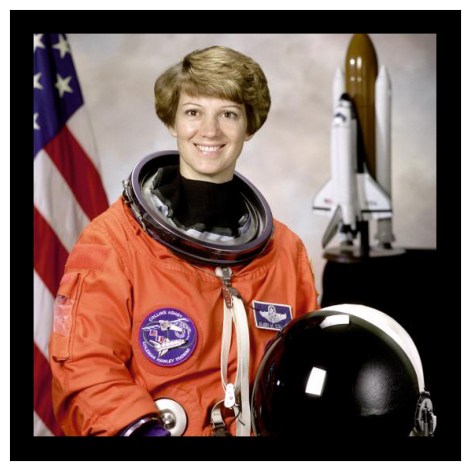

In [76]:
plot(p)

In [78]:
transform = transforms.Compose([ToPILImage(), transforms.Resize((512, 512)),ToTensor()])

p_t = transform(p)

ValueError: pic should be 2/3 dimensional. Got 4 dimensions.

In [86]:
p_t = F.interpolate(p, size=(512, 512), mode="bilinear", align_corners=True)

In [89]:
p_t.size(-2)

512